# ANÁLISIS DE DATOS

# 1. Generar Datos Ficticios

Primero, generaremos un conjunto de datos ficticios.

In [1]:
import pandas as pd
import numpy as np

# Generar datos ficticios
np.random.seed(0)
fechas = pd.date_range(start='2022-01-01', periods=200, freq='D')
categorias = ['Comida para Perros', 'Comida para Gatos', 'Comida para Aves', 'Comida para Peces']
data = {
    'Fecha': np.random.choice(fechas, 1000),
    'Categoria': np.random.choice(categorias, 1000),
    'Ventas': np.random.randint(100, 1000, 1000),
    'Ingresos': np.random.uniform(1000, 10000, 1000),
    'Promociones': np.random.randint(0, 20, 1000),
    'Descuento': np.random.uniform(0, 0.3, 1000)
}

df = pd.DataFrame(data)


In [2]:
# Guardar la data
df.to_csv('ventas_mascotas.csv', index=False)

## 2. Análisis Descriptivo

Realizaremos un análisis descriptivo de los datos.

In [3]:
# Estadísticas descriptivas
desc_stats = df.describe()
print(desc_stats)


                            Fecha       Ventas     Ingresos  Promociones  \
count                        1000  1000.000000  1000.000000  1000.000000   
mean   2022-04-12 09:47:31.200000   536.747000  5549.576778     9.145000   
min           2022-01-01 00:00:00   100.000000  1001.680425     0.000000   
25%           2022-02-23 00:00:00   300.000000  3310.944888     4.000000   
50%           2022-04-13 00:00:00   531.500000  5512.213147     9.000000   
75%           2022-05-30 00:00:00   762.000000  7825.842187    14.000000   
max           2022-07-19 00:00:00   999.000000  9992.872002    19.000000   
std                           NaN   266.333705  2586.200645     5.792714   

         Descuento  
count  1000.000000  
mean      0.143675  
min       0.000022  
25%       0.068575  
50%       0.142516  
75%       0.215175  
max       0.298720  
std       0.084841  


In [4]:
# Realizar el anàlisis descriptivo de cada variable utilice librerias
categoria_counts = df['Categoria'].value_counts()
print(categoria_counts)

Categoria
Comida para Peces     259
Comida para Gatos     254
Comida para Perros    254
Comida para Aves      233
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

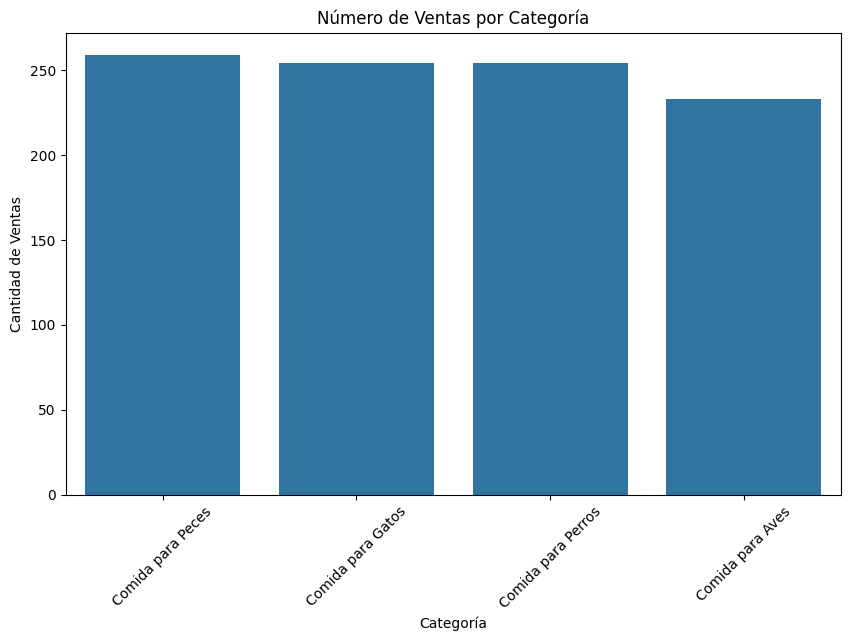

In [29]:
# Visualizar las ventas por categoría
plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values)
plt.title('Número de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.savefig('ventas_por_categoria.png')
plt.show()

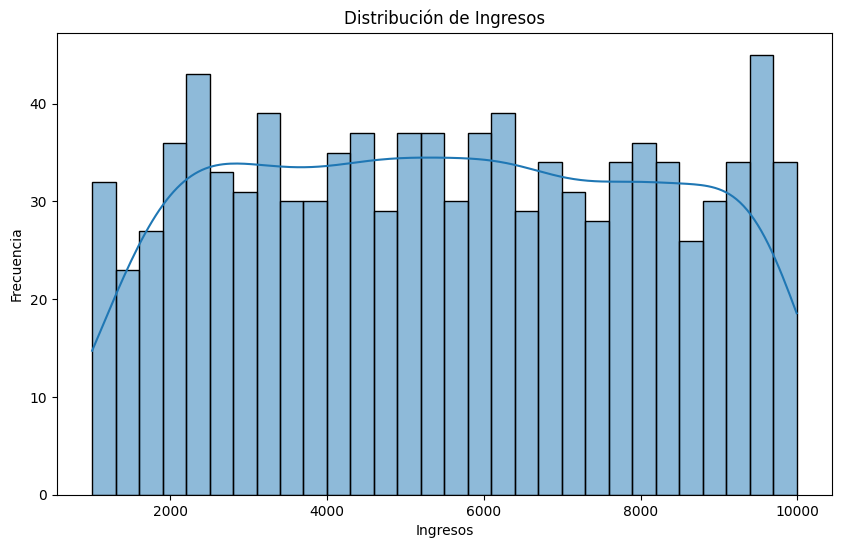

In [28]:
# Histograma de ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingresos'], bins=30, kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.savefig('histograma.png')
plt.show()

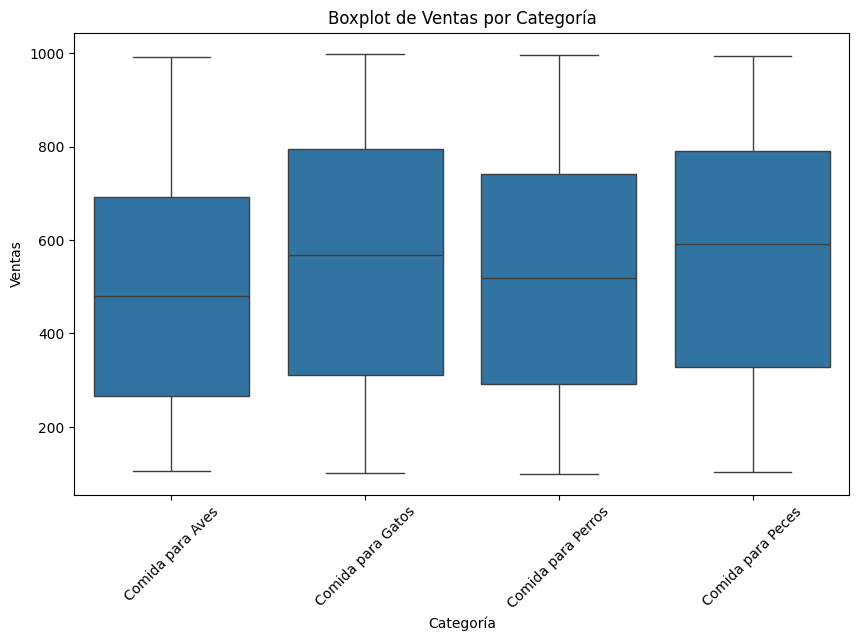

In [27]:
# Boxplot de ventas por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Ventas', data=df)
plt.title('Boxplot de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.savefig('boxplot.png')
plt.show()

## 3. Análisis Predictivo

Utilizaremos un modelo de regresión lineal para predecir las ventas.

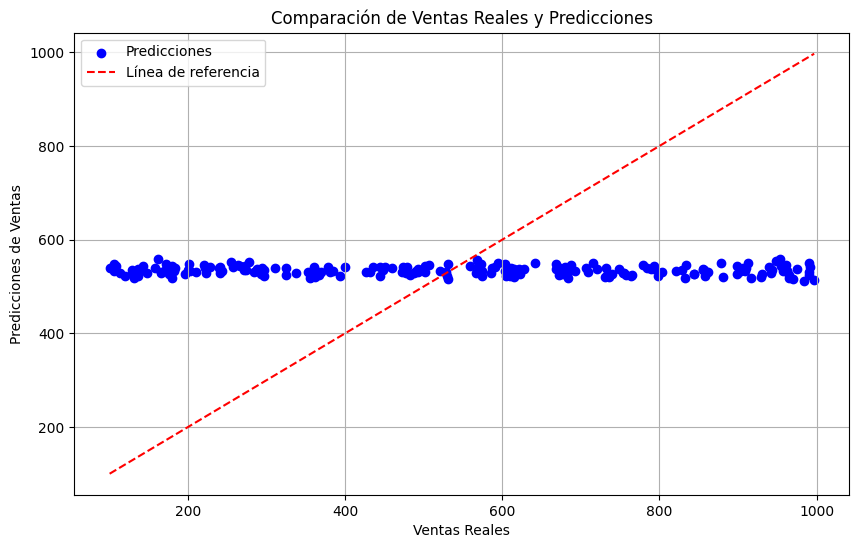

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = df[['Ingresos', 'Promociones', 'Descuento']]
y = df['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predicciones = model.predict(X_test)

#Representar de manera Gràfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de referencia')
plt.title('Comparación de Ventas Reales y Predicciones')
plt.xlabel('Ventas Reales')
plt.ylabel('Predicciones de Ventas')
plt.legend()
plt.grid()
plt.savefig('prediccion.png')
plt.show()

In [30]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.3 MB/s eta 0:00:00


In [31]:
import sweetviz as sv

In [32]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4. Análisis de Series Temporales

Realizaremos un análisis de series temporales con un gráfico.

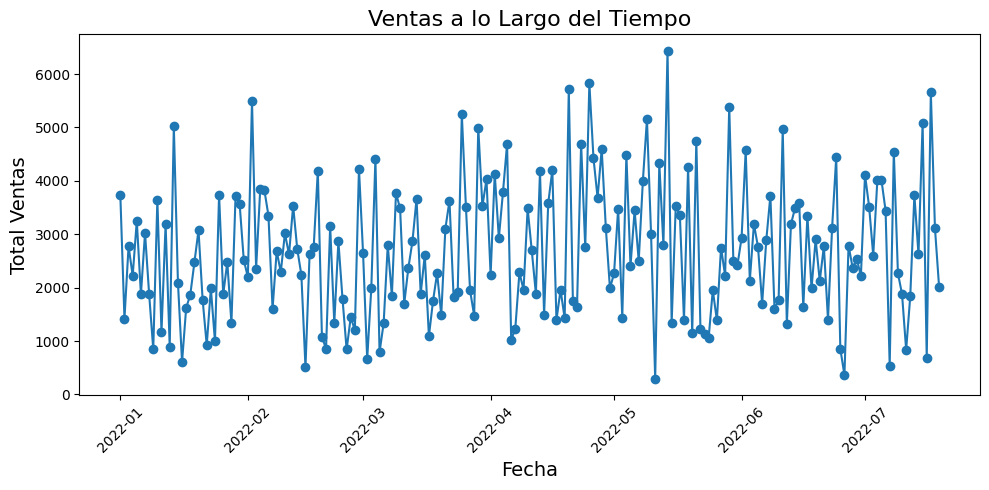

In [22]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_fecha = df.groupby('Fecha').agg({'Ventas': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(ventas_fecha['Fecha'], ventas_fecha['Ventas'], marker='o')
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Total Ventas", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('serie_temporal.png')
plt.show()

## 5. Segmentación de Datos
Realizaremos la segmentación de los datos.

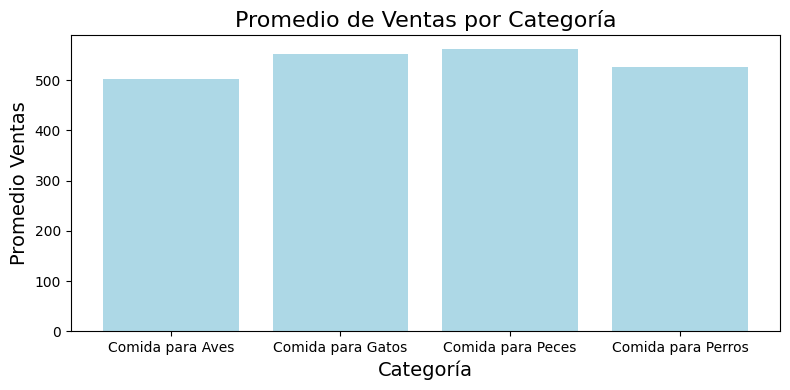

In [23]:
segmentos = df.groupby('Categoria').agg({'Ventas': 'mean'}).reset_index()

plt.figure(figsize=(8, 4))
plt.bar(segmentos['Categoria'], segmentos['Ventas'], color='lightblue')
plt.title("Promedio de Ventas por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Promedio Ventas", fontsize=14)
plt.tight_layout()
plt.savefig('segmentacion.png')
plt.show()

## 6. Optimización y Modelo de Decisiones

Realizaremos una optimización simple usando scipy.

In [24]:
from scipy.optimize import linprog

# Definir coeficientes de la función objetivo (negativa para maximizar)
c = [-20, -15]  # Ejemplo de coeficientes
A = [[1, 1], [20, 15]]
b = [40, 500]

# Realizar la optimización
res = linprog(c, A_ub=A, b_ub=b)
print("Resultados de la optimización:", res)

Resultados de la optimización:         message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -500.00000000000006
              x: [ 0.000e+00  3.333e+01]
            nit: 1
          lower:  residual: [ 0.000e+00  3.333e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.667e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## 7. Crear la Presentación Ejecutiva

Finalmente, crearemos la presentación en PowerPoint.

In [18]:
!pip install python-pptx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 19.3 MB/s eta 0:00:00


In [25]:
from pptx import Presentation
from pptx.util import Inches

# Crear presentación
prs = Presentation()

# Función para agregar un título y un subtítulo
def add_title_slide(title, subtitle):
    slide = prs.slides.add_slide(prs.slide_layouts[0])
    slide.shapes.title.text = title
    slide.placeholders[1].text = subtitle

# Diapositiva de título
add_title_slide("Análisis de Ventas de Comida para Mascotas", "Análisis completo de datos y resultados")

# Estadísticas Descriptivas
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Estadísticas Descriptivas"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = desc_stats.to_string()

# Gráfico de ventas por categoría
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Promedio de Ventas por Categoría"
slide.shapes.add_picture("segmentacion.png", Inches(0.5), Inches(1), width=Inches(8))

# Análisis de Series Temporales
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Ventas a lo Largo del Tiempo"
slide.shapes.add_picture("serie_temporal.png", Inches(0.5), Inches(1), width=Inches(8))

# Resultados de Optimización
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Resultados de Optimización"
optimization_result = f"Comida para Perros: {res.x[0]:.2f}\nComida para Gatos: {res.x[1]:.2f}\nGanancia Total: {-res.fun:.2f}"
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = optimization_result

# Conclusiones
slide = prs.slides.add_slide(prs.slide_layouts[5])
title = slide.shapes.title
title.text = "Conclusiones Finales"
conclusiones = (
    "1. Identificamos las categorías más vendidas y sus tendencias.\n"
    "2. El modelo predictivo proporciona información valiosa sobre ventas.\n"
    "3. Las promociones tienen un impacto significativo en las ventas.\n"
    "4. La optimización sugiere cantidades óptimas para maximizar ganancias."
)
content = slide.shapes.add_textbox(Inches(0.5), Inches(1), Inches(8), Inches(5))
content.text = conclusiones

# Guardar la presentación
prs.save("Analisis_Ventas_Pets_Completo.pptx")


In [ ]:
#Crear la presentaciòn de los datos con Power Bi
